<center><h1>Statistics for Machine Learning</h1></center>
&nbsp;
<center><h2>Population Parameters of Normal Distributions</h2></center>

### Overview

This notebook aims to give an intuitive overview of common population parameters in statistics, and how they can be applied to Normal distributions. Namely, these include the: mean, variance and standard deviation. The motivation behind why each measure is useful is given, and the formulae are also derived. Further discussions of histograms and calculating probabilities are also presented.

Throughout the notebook, the concepts shown are applied to heights and weights data from the Statistics Online Computational Resource dataset from the Unviversity of California Los Angeles (UCLA) [1]. The data has been scraped and written to a CSV file for easy use, which is available for download on Kaggle [2].

Vanilla Python has been used to implement the fundamental equations, so that the mathematics is not obscured behind 3rd party libraries. Matplotlib and NumPy have been used to perform the plotting.

### Contents

Loading the Data

Section 1 - Histograms and Distributions

Section 2 - Population Parameters

Section 3 - Plotting a Normal Distribution

Section 4 - Conclusion

Section 5 - Glossary

Section 6 - References

### Loading the Data

The SOCR dataset from UCLA contains height and weight information for 25,000 18 year olds, who form the population for this notebook.

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad

In [2]:
df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])
weights = list(df['Weight(Pounds)'])

heights.sort()
weights.sort()

print(f'Number of rows: {len(df)}')

Number of rows: 25000


<center><h2>Section 1 - Histograms and Distributions</h2></center>

### 1.1 - Using Histograms to Visualise the Distribution of Data

The heights and weights of the individuals can be plot using **histograms**. These are basic plots which groups data into **bins**. Each bin is a portion of the $x$ axis, for example this could be the region between $x$ = 50 and $x$ = 55. The plot will count the **frequency** of data points that are between 50 and 55 (how many there are), then draw a bar showing this count for every bin in the $x$-axis. In these examples, the $x$-axes represent the heights and weights respectively. Plotting data in this way gives a way to visualise how common certain values are in a dataset. For example, if the bar for 67-68 inches is the tallest on the heights histogram then we know that most commonly heights are between 67 and 68 inches. The technical term to describe how data is spread out is called its **distribution**, and so a histogram is one way to visualise the distribution of a dataset.

But why use bins and not simply plot a bar for exact values? The reason for this is that measurements rarely have the exact same value. Since height and weight measurements are continuous (they can take any decimal value of inches if your ruler is good enough), its most likely that every value will be unique. So if you plot these exact values, the count for each will probably be one. By grouping the data into bins, its gives a good idea about how the data is spread out in the data set.

In this example, a bin size of 150 bins was used. This can take some trial and error in order to get a good view of the data.

Text(0, 0.5, 'Frequency')

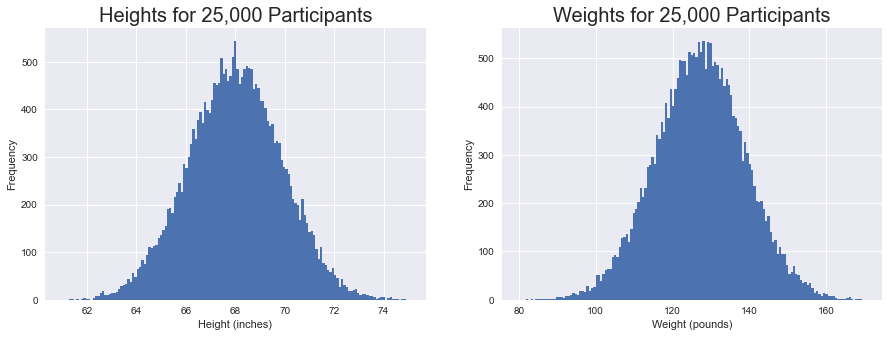

In [3]:
plt.style.use('seaborn')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].set_title('Heights for 25,000 Participants', fontsize=20)
ax[0].hist(heights, bins=np.linspace(61,75,150))
ax[0].set_xlabel('Height (inches)')
ax[0].set_ylabel('Frequency')

ax[1].set_title('Weights for 25,000 Participants', fontsize=20)
ax[1].hist(weights, bins=np.linspace(80,170,150))
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_ylabel('Frequency')

### 1.2 - Normal Distributions

The distributions above look very similar, and take a 'bell-curve' shape. This shows most of the data is concentrated in the middle of the graphs, so most people's height and weight are around the average, and then there are a few people who are much below or much above average. This distribution is very common in statistics, and is called the **Normal Distribution**. It is also sometimes called the **Gaussian Distribution** after Carl Gauss, a German mathematician who developed a lot of the theory behind it. Normal distributions are very common in nature, and can describe the distributions of everything from IQ to commuting times, and many other observations.

Since this distribution is so common, a equation to model these curves has been developed by mathematicians. This will be shown later in the notebook.

### 1.3 - Finding Probabilities from Histograms

Histograms can be used to find the probabilty of making an observation within a range of values. For example, if a height was randomly picked from the dataset, we can find the probability it is between 68 and 69 inches by:

&nbsp;

$
P(\text{68 < height < 69}) = \frac{\text{number of heights in between 68 and 69}}{\text{total number of heights}}
$

&nbsp;

To find the number of heights between 68 and 69, we can simply add up the frequencies for each bin between those two values. Then we can divide it by the total number of people in the **population**.

Probability height is between 68 and 69 inches: 0.21 (21%)


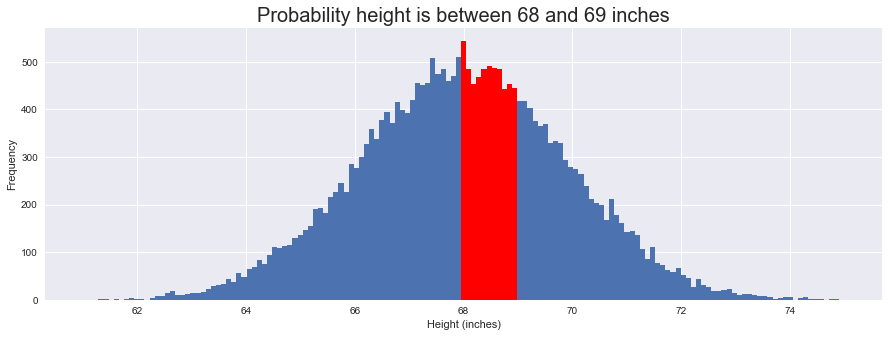

In [4]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('Probability height is between 68 and 69 inches', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Frequency')

N, bins, patches = ax.hist(heights, bins=np.linspace(61,75,150))

for bin_num in range(74,85):
    patches[bin_num].set_facecolor('r')

num_heights_in_bin = sum([patches[bin_num].get_height() for bin_num in range(74,85)])
total_num_heights = len(heights)
probability = num_heights_in_bin/total_num_heights

print(f'Probability height is between 68 and 69 inches: {probability:.2f} ({round(probability*100)}%)')

Simiarly, we can find the probability that a height will be under a certain value, e.g. 70 inches, by finding:

&nbsp;

$
P(\text{height < 70}) = \frac{\text{number of heights in bins below 70}}{\text{total number of heights}}
$

Probability height is below 70 inches: 0.86 (86%)


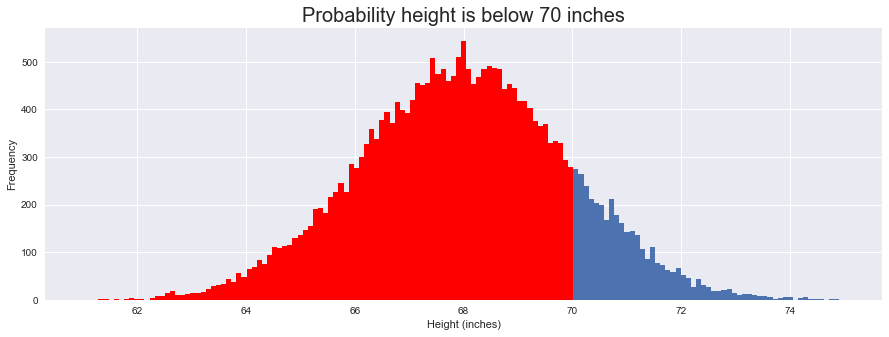

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('Probability height is below 70 inches', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Frequency')

N, bins, patches = ax.hist(heights, bins=np.linspace(61,75,150))

for bin_num in range(96):
    patches[bin_num].set_facecolor('r')

num_heights_in_bins = sum([patches[bin_num].get_height() for bin_num in range(96)])
total_num_heights = len(heights)
probability = num_heights_in_bins/total_num_heights

print(f'Probability height is below 70 inches: {probability:.2f} ({round(probability*100)}%)')

<center><h2>Section 2 - Population Parameters</h2></center>

### 2.1 - What are Population Parameters?

The group of 25,000 individuals are being treated as an entire population. That means that when we find the average height, we are saying this is the true average height for an 18 year old in this group. In 'SML 2 - Sampling a Distribution', we will consider a small portion of the dataset (called a **sample**) and use this to try to estimate the average of the entire dataset.

**Population parameters** are measures that give us descriptions for the entire population, including: 

* mean - the average value

* variance - a measure of the spread in the data

* standard deviation - another measure of spread


These allow us to summarise entire datasets with just a few numbers, and even plot curves for calculating probabilities as we will see later. Explanations for each population parameter are given below.

### 2.2 - Calculating the Population Mean

The population mean is the average height and weight for the entire dataset. Since we know all the heights and weights for this group, we can find an answer for the true mean of this population. This is as opposed to if we only knew a sample of the heights and weights, in which case we could only make an estimation of the mean.

In statistics, the mean of an entire population is denoted by $μ$, and is defined as the sum of all the values, divided by the number of measurements:

$
μ = \frac{\sum  \limits _{i=1}^{N} x_i}{N}
$

where $N$ is the size of the population.

In [6]:
def mean(values):
    return sum(values)/len(values)
    
mu_heights = mean(heights)
mu_weights = mean(weights)

print(f'Mean population height: {mu_heights:.2f} inches')
print(f'Mean population weight: {mu_weights:.2f} pounds')

Mean population height: 67.99 inches
Mean population weight: 127.08 pounds


### 2.3 - Calculating the Population Variance

The variance gives a measure for the 'spread' of the data, and is found by calculating the average 'squared difference' between each of the data points and the mean. The formula for variance is given as:

$
\sigma^2 = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu)^2}{N}
$


In [7]:
def variance(values):
    mu = mean(values)
    N = len(values)
    return sum([(x-mu)**2 for x in values]) / N

var_heights = variance(heights)
var_weights = variance(weights)

print(f'Variance of population height: {var_heights:.2f} inches^2')
print(f'Variance of population weight: {var_weights:.2f} pounds^2')

Variance of population height: 3.62 inches^2
Variance of population weight: 135.97 pounds^2


### 2.4 - Understanding the Variance
To break down the reasoning behind this formula, its important to understand what the variance is trying to describe. The variance is a measure of the spread of data, that is, how much the data as a whole is distributed about the mean. A variance of 0 means that all the data points are equal to the mean, and so there is 0 spread in the dataset. The greater the value of the variance, the greater the average distance a data point is from the mean of the dataset. There is no maximum value the variance can take, however a negative is not possible since you cannot have a negative distance (since all the distances are squared).

This explains why it is useful to have an average of the difference between each point and the mean. The only part left unexplained is why the difference is squared. The answer is that it doesn't have to be! It was decided by mathematicians that squaring the differences was the best action to take, since this would make each distance positive, and prevents negative differences cancelling out positive ones. But this could have been accomplished with taking the absolute difference between each point and the mean. It turns out there are a few benefits to squaring the differences however, one of which includes the fact defining the variance in this way means that it is continuously differentiable (its derivatitve is also differentiable). This is not the case when taking the absolute value for the difference. Being continuously differentiable is a very useful property that will be leveraged in later notebooks.

For interest, some mathematicians still argue that taking the absolute difference is a better method, and you can find more in [3].

### 2.5 - Alternative Form for the Variance Equation

The equation for variance has a summation of two terms: an $x_i$ term and a -$bar{x}$ term. One of the properties of the summation operator is that the summation of terms together is equal to the summation of each term individually. This is called **linearity** [4], and means that we can split the terms out into two summations as shown below. Also note that variance can be written as $Var(x)$ as well as $\sigma^2$ - this is helpful when we have multiple variables we want to find the variance for. Combining these facts gives:

&nbsp;

$
Var(X) = \frac{\sum  \limits _{i=1}^{N} (x_i)^2}{N} - \frac{\sum  \limits _{i=1}^{N} (\mu)^2}{N}
$

&nbsp;

Note here that adding the mean to itself $N$ times and then dividing by $N$ simply returns $N$, so we could rewrite this equation in the following form:

&nbsp;

$
Var(X) = \frac{\sum  \limits _{i=1}^{N} (x_i)^2}{N} - \mu^2
$

&nbsp;

Finally, we know that the mean can be written as a sum of all the measurements divided by the population size, so we can substitute this expression into the above equation. This is a useful result that comes up time and time again in proofs for more complex equations in statistics. It is useful to introduce this form now, especially since it is a simple result when working from first principles.

&nbsp;

$
Var(X) = \frac{\sum  \limits _{i=1}^{N} (x_i)^2}{N} - \frac{\sum  \limits _{i=1}^{N} (x)^2}{N}
$


### 2.5 - Calculating the Population Standard Deviation

The variance gives a measure for the 'spread' of the data, but the units are inconvenient to work with. Since it uses the average squared distance, the units are squared too. For example, if the heights are measured in inches, then the variance has units of inches squared. We can solve this by taking the square root of the variance - this is called the standard deviation. The standard deviation for a population is denoted by $σ$, and has the formula:

&nbsp;

$
σ = \sqrt{\frac{\sum  \limits _{i=1}^{N} (x_i - \mu)^2}{N}}
$

In [8]:
def stdev(values):
    return math.sqrt(variance(values))

sigma_heights = stdev(heights)
sigma_weights = stdev(weights)

print(f'Standard deviation of population height: {sigma_heights:.2f} inches')
print(f'Standard deviation of population weight: {sigma_weights:.2f} pounds')

Standard deviation of population height: 1.90 inches
Standard deviation of population weight: 11.66 pounds


<center><h2>Section 3 - Plotting a Normal Distribution</h2></center>

### 3.1 - Using Population Parameters to Plot a Normal Distribution Curve

Now that we have calculated the population parameters for the heights and weights, we can use them to plot Normal distribution curves. Mathematicians have developed a general equation that can be used to represent any random variable that follows a Normal distribution. This equation produces a curve whose shape depends only on the mean and standard deviation. 

Being able to plot this is useful, since it allows us to make predictions about the data, just by knowing the average value and its spread. This include calculating probabilities, in a similar way to the histograms shown in Section 1. In the next notebook, we will look at taking small samples from a population to estimate the mean and standard deviation. This will allow us to make an estimation for the Normal curve and so make predictions about the entire population. For now, we will focus on plotting the curves and fitting them to the data.

The shape of the curves is dependent on the population parameters. Recall that the mean is the average value where most of the data centers around: this defines the centre of the curve. Also recall that the standard deviation gives a measure of the spread of the data: this defines how wide the curve should be. These two values give us everything we need to plot the Normal distribution curve.

**Note:** There are other types of distributions that exist, and these have some other parameters that help define their shape (just like mean and standard devaition define the shape of a Normal distribution). For these distributions, their parameters are also called population parameters.

### 3.2 - Normal Distribution Notation

A **random variable** is a measurement we can take that has a random value: in this notebook we have looked at heights and weights. These can be considered to be random, and take on a Normal distribution. Because of this, we say that the random variables height and weight are **Normally distributed**. This has a common short-hand, and is given by:

&nbsp;

$
H \sim N(\mu, \sigma^2)
$

$
W \sim N(\mu, \sigma^2)
$

&nbsp;

where $H$ is the random variable representing height and $W$ is the random variable representing weight.

The $N$ stands for 'Normally distributed', and $\mu$ and $\sigma$ represent the mean and standard deviation respectively. Since we know these values for the heights and weights data, we can write the full notation below:

&nbsp;

$
H \sim N(67.99, 1.90^2)
$

$
W \sim N(127.08, 11.66^2)
$

&nbsp;

### 3.3 - Properties of the Normal Distribution

The Normal distribution curve has a few special properties that make it very useful. These properties were actually enforced by the mathematicians who designed the equation, and include the following features:

* the curve is symmetric, with low values at the extremes and high values near the center

* the area underneath the curve is equal to 1

* the curve stretches to positive and negative infinity, but the height above the $x$ axis becomes vanishingly small at these extremes

These properties allow the Normal distribution to be used with calculating probabilities - just like the histograms shown earlier (more on this later). In addition, the equation matches nature very well.

### 3.4 - Equation for the Normal Distribution

The equation for the normal distribution is given below. The full derivation is not included here (simply because it is quite long), but this YouTube video does an excellent job of explaining where it comes from [5]. Instead, this notebook will focus on gaining an intuition as how the equation can represent different spreads and means in distributions.

$
f(x) = \frac{1}{{\sigma \sqrt {2\pi } }} e^{-\frac{{(x-\mu)^2}}{2\sigma ^2}}
$


In [9]:
def normal(x_values, mu=None, sigma=None):
    if mu == None:
        mu = mean(x_values)
    if sigma == None:
        sigma = stdev(x_values)

    return [(1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2)))) for x in x_values]

### 3.5 - Plotting Some Example Normal Distributions

Since the population parameters define the shape of the curve, we can vary the values for mean and standard deviation and observe the effect this has on the curve's shape.

Increasing the mean will move the curve to the right, since the values will cluster around a higher value of $x$. Similarly decreasing the mean will move the curve to the left, since the values will cluster around a lower value of $x$.

Increasing the standard deviation will give a greater spread in the curve. Since the area under the curve will always be equal to 1 (as described earlier in this section), this means that the height of the curve must decrease. Similarly, decreasing the standard deviation will give a smaller spread, and so the height of the curve will increase.

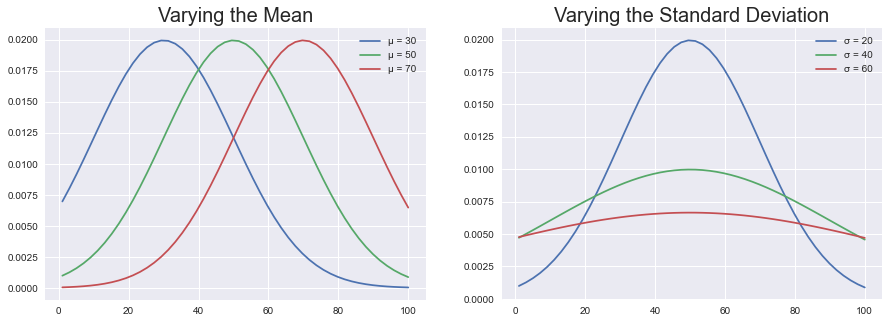

In [10]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))
x_values = np.linspace(1,100)

# Vary μ
ax[0].set_title('Varying the Mean', fontsize=20)
for mu in [30,50,70]:
    ax[0].plot(x_values, normal(x_values, mu=mu, sigma=20), label=f'μ = {mu}')
ax[0].legend()

# Vary σ
ax[1].set_title('Varying the Standard Deviation', fontsize=20)
for sigma in [20,40,60]:
    ax[1].plot(x_values, normal(x_values, mu=50, sigma=sigma), label=f'σ = {sigma}')
ax[1].legend()

### 3.6 - Fitting a Normal Distribution to the Heights and Weights Data

Now that we have an equation for a Normal distribution curve in terms of the population parameters, we can fit a curve to the heights and weights data. One consideration we have to make first is that the area under the heights and weights histograms from earlier will not be equal to 1, and so the scales for the two plots will be different. To overcome this problem but still keep the shape of the histograms, we can normalise the frequency values. That is, we can divide each bar height by the sum of all the heights or weights. This makes the area of the histogram and the area of the normal distribution curve both equal to 1 so we can compare their shapes.

Pay attention to the $y$-axis here, this will be explained below the plots.

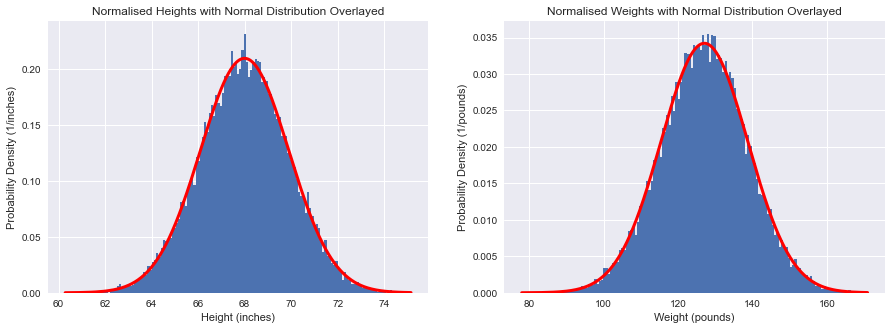

In [11]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].set_title('Normalised Heights with Normal Distribution Overlayed')
ax[0].set_xlabel('Height (inches)')
ax[0].set_ylabel('Probability Density (1/inches)')
ax[0].hist(heights, bins=np.linspace(61,75,150), density=True)
ax[0].plot(heights, normal(heights), color='red', linewidth=3)


ax[1].set_title('Normalised Weights with Normal Distribution Overlayed')
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_ylabel('Probability Density (1/pounds)')
ax[1].hist(weights, bins=np.linspace(80,170,150),density=True)
ax[1].plot(weights, normal(weights), color='red', linewidth=3)

### 3.7 - Probability Density Functions - What is the Curve actually Plotting?

In order to match the Normal curve to the histograms, we had to divide the $y$-values (frequency) by the size of the population. This was to make the area under both graphs equal to 1, so that the scales match. This idea that the area under the graph is 1 was developed by mathematicians so that the Normal curve can easily be used to calculate probabilities. The area does not HAVE to be 1, it was CHOSEN to be 1 by mathematicians. If it was not chosen this way, then the equation we use would look slightly different.

By forcing the area to be 1 like this, we can find the probability that $x$ is between some values by finding the area under the curve between those values. This is very simple to do (more later in this section). As a check, the probability that $x$ is between $-\infin$ and $\infin$ should 1, since that is every possible value that $x$ can take - and it is since this is a property of the Normal distribution curve.

So what is the $y$-axis for the Normal distribution? Well to get the heights data to have an area of 1, the frequency (probability) had to be divided by the sum of the heights. This gives a sort of 'probability per inch' value. Mathematicians noticed a similarity with this 'something per something' form, and felt it was similar to density. For this reason, the values on the $y$-axis are called the **probability density**, and curve $f(x)$ is called a **Probability Density Function** (PDF). The probability density values themselves aren't all that useful, they mostly help plot the shape of the curve, but the PDF that generates them is incredibly important.

**Note:** since the probability density is found by dividing the frequency by the sum of the heights or weights, the units for the $y$-axes are $\frac{1}{inches}$ and $\frac{1}{pounds}$ respectively. If this seems a bit strange, just know that the Normal curve was designed so it is easy to use the area underneath it to find probabilities. To multiple the length under the curve by the height (and get area), the units must be inches and $\frac{1}{inches}$ to cancel each other out and give a dimensionless probability value.

### 3.8 - Calculating Probabilities using the Normal Distribution Curve

Since the area underneath the curve between two values $a$ and $b$ is equal to the probability of a measurement being between those values, we need a way to calculate the area under the curve. We can do this using integration, and setting the limits of the integral equal to the bounds $a$ and $b$:

&nbsp;

$
P(a \leq x \leq b) = \int_{a}^{b} \frac{1}{{\sigma \sqrt {2\pi } }} e^{-\frac{{(x-\mu)^2}}{2\sigma ^2}}dx
$

&nbsp;

We can validate this by taking the integral between $-\infin$ and $\infin$, which represents the probability that a measurement will take any of the values, which should equal 1.

&nbsp;

$
\int_{-\infin}^{\infin} \frac{1}{{\sigma \sqrt {2\pi } }} e^{-\frac{{(x-\mu)^2}}{2\sigma ^2}}dx = 1
$

&nbsp;

We can use the Normal distribution PDF to find the probability that the height of a random person in this population is between 68 and 69 inches like we did using the histogram. This is equal to the area under the curve between $x$ = 68, $x$ = 69:

&nbsp;

$
P(68 \leq x \leq 69) = \int_{68}^{69} \frac{1}{{\sigma \sqrt {2\pi } }} e^{-\frac{{(x-\mu)^2}}{2\sigma ^2}}dx
$

&nbsp;

Probability height is between 68 and 69 inches: 0.20 (20%)


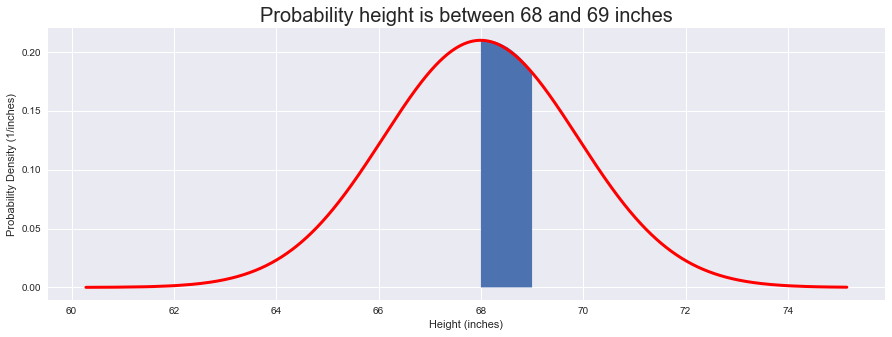

In [12]:
fig, ax =plt.subplots(figsize=(15,5))

x_range = np.linspace(68,69,5500)

ax.set_title('Probability height is between 68 and 69 inches', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Probability Density (1/inches)')
ax.plot(heights, normal(heights), color='red', linewidth=3)

ax.fill_between(x_range, normal(heights)[12000:17500])

def height_integrand(x, mu, sigma):
    return (1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2))))
    

probability = quad(height_integrand, 68, 69, args=(mean(heights), stdev(heights)))[0]

print(f'Probability height is between 68 and 69 inches: {probability:.2f} ({round(probability*100)}%)')


Since the curve is an approximation to the histogram data, it is expected there be some difference in the probability values. In this case, the Normal curve gives a probability value of 20%, where the histogram gave a value of 21%. This shows the curve gave an underestimation here, which makes sense since some of the histogram bars were taller than the curve in this region. As the size of the population grows, the shape of the histogram can be expected to tend closer to the Normal, and the difference in the probabilities will tend to zero. This is because of the **Central Limit Theorem**, which will be covered in a future notebook.

### 3.9 - Note about Probabilities and Areas

Note how for continuous PDFs, the area is used to find the probability a measurement is between two values. This means that if we try to find the probability a measurement is exactly equal to a certain value, we will be finding the area of a 1-D line (which will be equal to 0). This means that the probability that a continuous measurement is equal to a specific value will always be zero, which seems very strange! Mathematically however, this makes sense. The measure can take any value between -$\infin$ and $\infin$, and infinitely many values between each tick on the $x$-axis. The probability that a measurement is equal to any specific one of these values is $\frac{1}{\infin}$, which of course equal zero. Because of this, we can only find the probability that a continuous measurement is BETWEEN two values. This is not the case for discrete random variables, which are represented by discrete PDFs and can only take specific values (e.g. a di can only take values 1 to 6, not decimal values in between), but this is for another notebook.

<center><h2>Section 4 - Conclusion</h2></center>

This notebook introduced three common population parameters, the: mean, variance and standard deviation. The motivation behind why each is useful was shown, and each measure was applied to some examples using heights and weights data. An overview of the Normal distribution was also given, showing examples of where this might occur in nature, how to visualise it using histograms and a smooth curve, and also how to calculate probabilities based on known data. These concepts are essential for a good foundational knowledge of statistics, and will be built upon in future notebooks to explore more advances concepts.

<center><h2>Section 5 - Glossary</h2></center>

**Bin**
> a portion of the $x$-axis which is used to group data points together to plot a histogram

**Central Limit Theorem**
> a theorem stating the distribution of sample parameters tends towards the population parameters as the sample size increases

**Distribution**
> the way data is spread, or 'distributed'

**Frequency**
> the number of data points in a bin on a histogram (in general frequency means 'how many')

**Gaussian Distribution**
> another name for the Normal distribution

**Histogram**
> a plot using bins to visualise the distribution of data

**Normal Distribution**
> a common distribution in nature where measurements are rarer at the extremes and more common in the middle (and at a maximum at the mean)

**Normally Distributed**
> data that follows a normal distribution

**Population**
> an entire group for which measurements can be taken from, as opposed to a small selection used in a sample

**Population Parameter**
> a measure that describes the distribution of a dataset e.g. mean, variance, standard deviation

**Probability Density Function (PDF**)
> an equation that produces a smooth curve representation of the histogram for some data, the area underneath which represents the probability a measurement takes a value between two bounds

**Random Variable**
> a quantity that depends on random events, e.g. growing to a specific height

**Sample**
> a small portion of a dataset, as opposed to the entire population

<center><h2>Section 6 - References</h2></center>

[1] SOCR Heights and Weights dataset - [UCLA](http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html)

[2] Dataset download - [Kaggle](https://www.kaggle.com/burnoutminer/heights-and-weights-dataset/version/1)

[3] Calculating variance with the absolute differences - [Stephen Gorard](https://emilkirkegaard.dk/en/wp-content/uploads/Revisiting-a-90-year-old-debate-the-advantages-of-the-mean-deviation.pdf)

[4] Linearity property of the summation operator - [Proof Wiki](https://proofwiki.org/wiki/Summation_is_Linear)

[5] Derivation of the Normal Distribution Equation - [YouTube](https://www.youtube.com/watch?v=cTyPuZ9-JZ0)